In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
from datetime import datetime
from pgbm_model import pgbm_pred
import matplotlib.pyplot as plt
from preprocessing import get_nn_data
from lstm import build_model, make_pred
from plots_lstm import plot_loss, plot_comp 
from sklearn.metrics import mean_squared_error as mse 

In [2]:
CITY = 3304557
CITY_NAME = 'Rio de Janeiro'
STATE = 'RJ'
FILENAME_DATA = f'../../data/dengue_{CITY}_cluster.csv'

In [3]:
df_dengue = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_dengue.index = pd.to_datetime(df_dengue.index)
df_dengue

,casos_3303203,casos_est_3303203,casos_est_min_3303203,casos_est_max_3303203,p_rt1_3303203,p_inc100k_3303203,temp_min_3303203,temp_max_3303203,umid_min_3303203,pressao_min_3303203,...,casos_3304557,casos_est_3304557,casos_est_min_3304557,casos_est_max_3304557,p_rt1_3304557,p_inc100k_3304557,temp_min_3304557,temp_max_3304557,umid_min_3304557,pressao_min_3304557
2010-01-03,0,0.0,0,0,0.00000,0.000000,24.333333,33.000000,42.000000,1009.666667,...,31,31.0,31,31.0,0.000000e+00,0.459408,24.333333,33.000000,42.000000,1009.666667
2010-01-10,0,0.0,0,0,0.00000,0.000000,25.428571,34.000000,43.285714,1008.000000,...,45,45.0,45,45.0,0.000000e+00,0.666883,25.428571,34.000000,43.285714,1008.000000
2010-01-17,0,0.0,0,0,0.00000,0.000000,24.142857,34.000000,43.857143,1010.285714,...,48,48.0,48,48.0,0.000000e+00,0.711341,24.142857,34.000000,43.857143,1010.285714
2010-01-24,0,0.0,0,0,0.00000,0.000000,23.714286,34.285714,39.285714,1009.000000,...,56,56.0,56,56.0,0.000000e+00,0.829898,23.714286,34.285714,39.285714,1009.000000
2010-01-31,1,1.0,1,1,0.00000,0.614655,23.857143,33.857143,41.285714,1009.857143,...,69,69.0,69,69.0,0.000000e+00,1.022550,23.857143,33.857143,41.285714,1009.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,0,0.0,0,0,0.00000,0.000000,19.285714,24.428571,69.148014,1013.857143,...,229,255.0,240,278.0,5.712260e-08,3.779000,19.285714,24.428571,69.148014,1013.857143
2022-06-12,0,0.0,0,0,0.00000,0.000000,17.571429,22.714286,71.092771,1013.714286,...,122,156.0,138,188.0,6.661340e-16,2.311860,17.571429,22.714286,71.092771,1013.714286
2022-06-19,1,1.0,1,1,0.81203,0.614655,15.571429,23.000000,59.035314,1016.428571,...,156,204.0,180,248.0,6.709000e-03,3.023200,15.571429,23.000000,59.035314,1016.428571
2022-06-26,0,0.0,0,0,0.00000,0.000000,17.285714,25.857143,58.679486,1016.857143,...,109,185.0,143,258.0,1.732270e-01,2.741630,17.285714,25.857143,58.679486,1016.857143


## Neural network model 

Parameters of the models:

In [4]:
END_DATE = '2019-12-31'  # assign the last day used to evaluate the dengue model 

END_TRAIN_DATE = '2016-01-01'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = df_dengue.shape[1] +1 # number of features

Let's train the model with the loss function == msle 

Compilation Time :  0.0024290084838867188
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 

2023-01-17 09:04:28.073053: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


328/328 [==============================] - 2s 3ms/step - loss: 0.0114 - accuracy: 0.3049 - mape: 314.7527 - mse: 0.0197 - val_loss: 0.0112 - val_accuracy: 0.3621 - val_mape: 97.0440 - val_mse: 0.0235
Epoch 2/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.2683 - mape: 116.4028 - mse: 0.0089 - val_loss: 0.0063 - val_accuracy: 0.2586 - val_mape: 217.0247 - val_mse: 0.0143
Epoch 3/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.3293 - mape: 122.2391 - mse: 0.0068 - val_loss: 0.0043 - val_accuracy: 0.3103 - val_mape: 97.7227 - val_mse: 0.0087
Epoch 4/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.3293 - mape: 148.6377 - mse: 0.0060 - val_loss: 0.0026 - val_accuracy: 0.3793 - val_mape: 145.8669 - val_mse: 0.0057
Epoch 5/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.3689 - mape: 144.8909 - mse: 0.0061 - val_loss: 0.0037 - val_accur

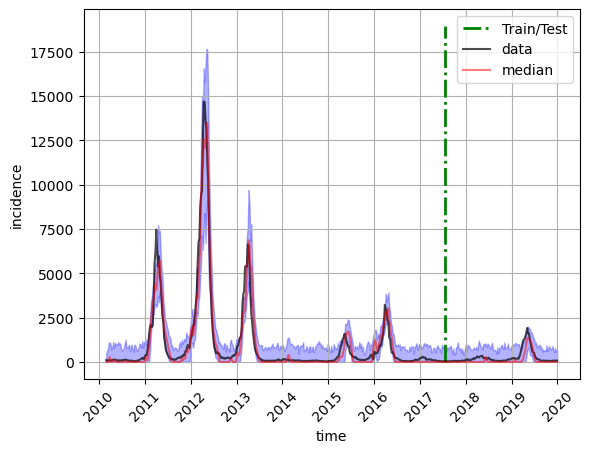

CPU times: user 1min 59s, sys: 7.22 s, total: 2min 6s
Wall time: 1min 48s


In [5]:
%%time

model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

metrics_msle, hist_msle, m_train, m_val = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 0.75, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle', filename = FILENAME_DATA)

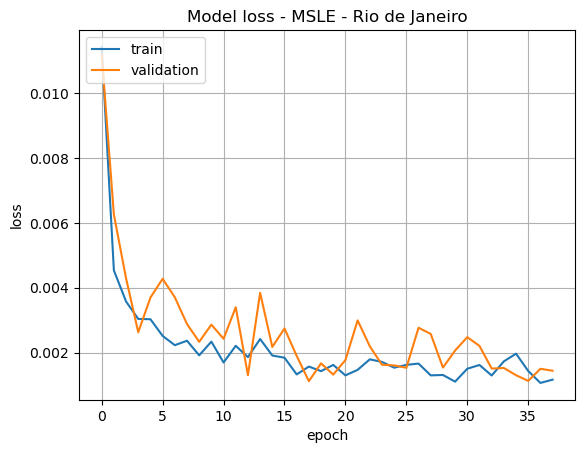

In [6]:
plot_loss(hist_msle, title = 'Model loss - MSLE - Rio de Janeiro')

To specialize our lstm dengue model to predict better the peak of cases we propose a custom loss function. This function gives a weight of 10 to the predictions of ascending cases in the train data. 

This weight is given to the observations in the training data, where the fourth value is bigger than the second value of the target data. (Remember it is an array of length four since we forecast the next 4 observations).  

This functions is defined as: 

```
def custom_loss_msle(p = 1):
    """
    :param p: 
    """
    
    def my_loss_msle(y_true, y_pred):
        """
        :param y_true:
        :param y_pred: 
        """

        def f1(): 
            
            loss = tf.math.log(tf.math.add(y_true, 1)/ tf.math.add(y_pred, 1))
    
            loss = tf.square(loss)
        
            return tf.multiply(loss, p) 
        
        def f2(): 
            
            loss = tf.math.log(tf.math.add(y_true, 1)/ tf.math.add(y_pred, 1))
    
            loss = tf.square(loss)
        
            return loss

        msle = tf.cond(tf.less(tf.gather(y_true, 0)[1],tf.gather(y_true, 0)[3]) , 
                                     true_fn = f1,
                                     false_fn = f2 )

        return tf.reduce_mean(msle) 
    
    return my_loss_msle 
```

Let's train the model with a custom loss function:

Compilation Time :  0.0017457008361816406
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

328/328 [==============================] - 1s 3ms/step - loss: 0.0053 - accuracy: 0.3902 - mape: 111.1164 - mse: 0.0033 - val_loss: 0.0066 - val_accuracy: 0.4828 - val_mape: 103.0641 - val_mse: 0.0057
Epoch 33/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.3750 - mape: 109.2778 - mse: 0.0040 - val_loss: 0.0092 - val_accuracy: 0.4483 - val_mape: 89.3186 - val_mse: 0.0050
Epoch 34/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.3933 - mape: 101.0040 - mse: 0.0034 - val_loss: 0.0085 - val_accuracy: 0.4483 - val_mape: 91.4643 - val_mse: 0.0050
Epoch 35/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0049 - accuracy: 0.4024 - mape: 94.2564 - mse: 0.0029 - val_loss: 0.0064 - val_accuracy: 0.4310 - val_mape: 76.4299 - val_mse: 0.0034
Epoch 36/400
328/328 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.4146 - mape: 100.5546 - mse: 0.0041 - val_loss: 0.0093 - val_acc

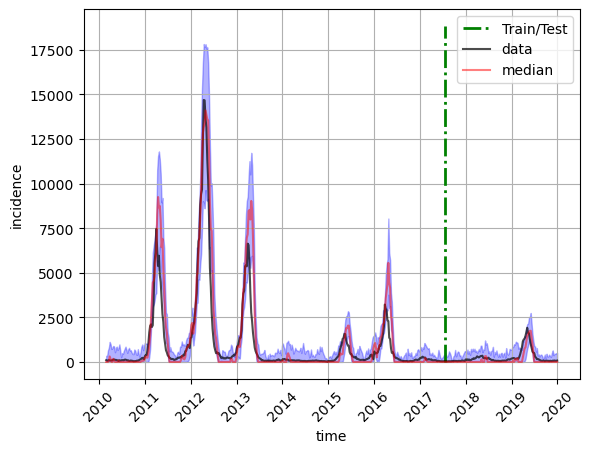

In [7]:
from lstm import custom_loss_msle

model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = custom_loss_msle(p=10))

metrics_c_msle, hist_c_msle, m_c_train, m_c_val = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 0.75, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'custom_msle', filename = FILENAME_DATA)

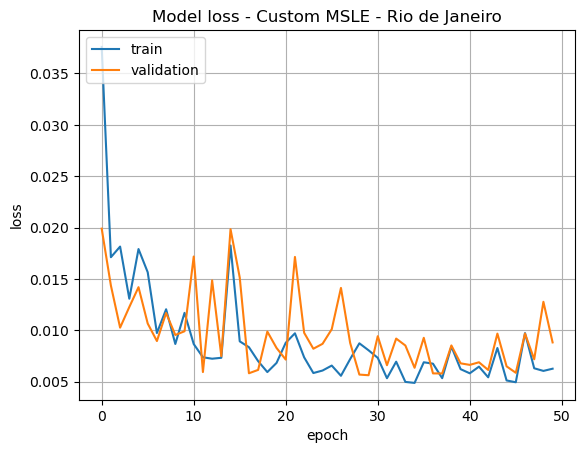

In [8]:
plot_loss(hist_c_msle, title = 'Model loss - Custom MSLE - Rio de Janeiro')

Comparing the performance of the strategies:

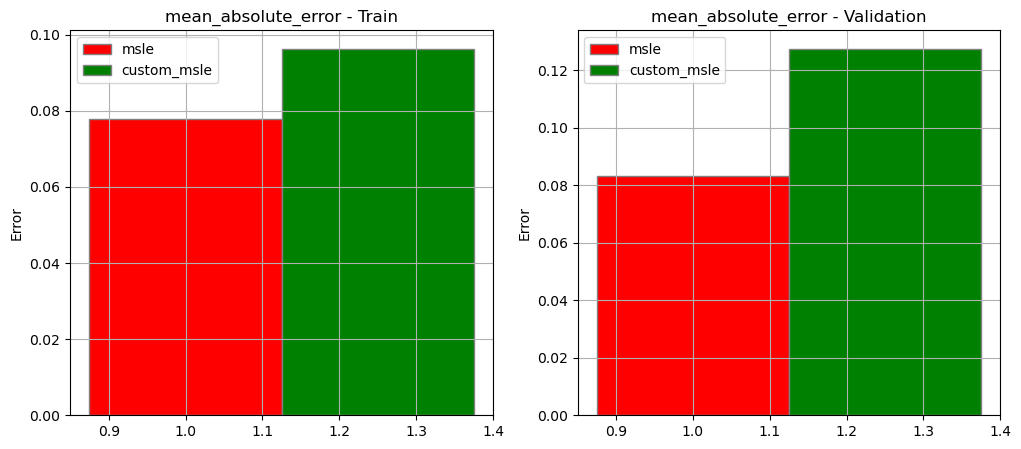

In [9]:
plot_comp(m_train, m_c_train,m_val, m_c_val, metric = 'mean_absolute_error')

Now, let's retrain the models with all the data available to apply the transfer learning step later:

In [10]:
END_DATE = '2019-01-01'

Compilation Time :  0.001934051513671875
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                

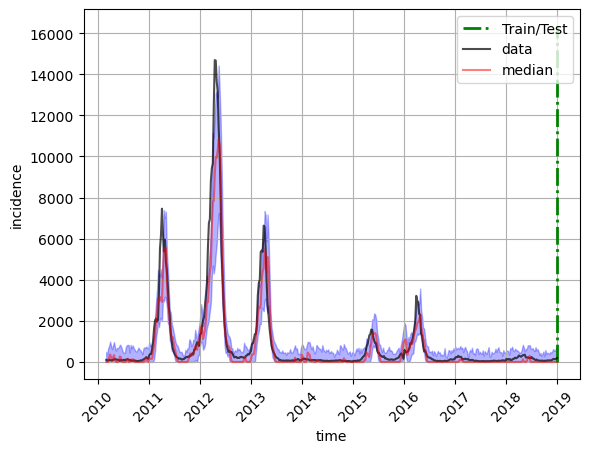

In [11]:
model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 1.0, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle_all',  filename = FILENAME_DATA)

Compilation Time :  0.0020761489868164062
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

391/391 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.3785 - mape: 108.0844 - mse: 0.0045 - val_loss: 0.0074 - val_accuracy: 0.4000 - val_mape: 129.0986 - val_mse: 0.0049
Epoch 33/400
391/391 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.3811 - mape: 119.5890 - mse: 0.0029 - val_loss: 0.0052 - val_accuracy: 0.3429 - val_mape: 95.2627 - val_mse: 0.0070
Epoch 34/400
391/391 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.3632 - mape: 101.0678 - mse: 0.0025 - val_loss: 0.0040 - val_accuracy: 0.3429 - val_mape: 113.1198 - val_mse: 0.0031
Epoch 35/400
391/391 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.3478 - mape: 109.5039 - mse: 0.0027 - val_loss: 0.0078 - val_accuracy: 0.3714 - val_mape: 88.5160 - val_mse: 0.0041
Epoch 36/400
391/391 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.3708 - mape: 122.4434 - mse: 0.0024 - val_loss: 0.0046 - val_a

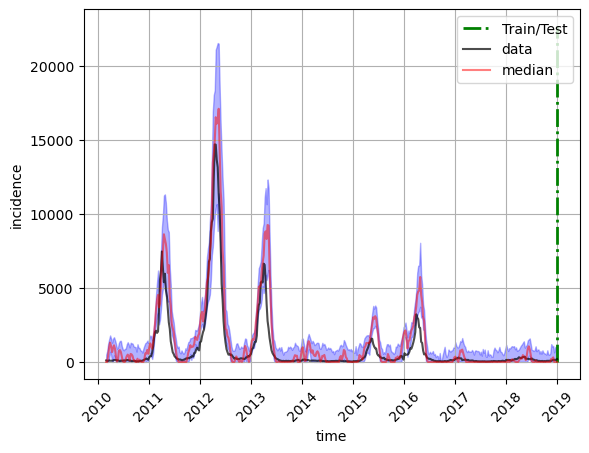

In [12]:
model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = custom_loss_msle(p=10))

m_c_msle_all, h_c_msle_all, m_c_train_all, m_c_val_all = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 1.0, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'custom_msle_all',  filename = FILENAME_DATA)

PGBM model

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Estimator 0/100, Train metric: 2176.0924
Estimator 1/100, Train metric: 1987.0962
Estimator 2/100, Train metric: 1816.4580
Estimator 3/100, Train metric: 1661.9067
Estimator 4/100, Train metric: 1518.9220
Estimator 5/100, Train metric: 1389.1730
Estimator 6/100, Train metric: 1273.7025
Estimator 7/100, Train metric: 1167.1648
Estimator 8/100, Train metric: 1069.2749
Estimator 9/100, Train metric: 979.3383
Estimator 10/100, Train metric: 897.5895
Estimator 11/100, Train metric: 823.2296
Estimator 12/100, Train metric: 755.3734
Estimator 13/100, Train metric: 693.4966
Estimator 14/100, Train metric: 637.1928
Estimator 15/100, Train metric: 585.8342
Estimator 16/100, Train metric: 538.3995
Estimator 17/100, Train metric: 495.5352
Estimator 18/100, Train metric: 455.9887
Estimator 19/100, Train metric: 419.9377
Estimator 20/100, Train metric: 387.0360
Estimator 21/100, Train metric: 356.8979
Estimator 22/100, Train metric: 329.4465
Estimator 23/100, Train metric: 304.3267
Estimator 24/100,

Estimator 4/100, Train metric: 1537.0354
Estimator 5/100, Train metric: 1411.0869
Estimator 6/100, Train metric: 1292.1131
Estimator 7/100, Train metric: 1187.6644
Estimator 8/100, Train metric: 1092.2467
Estimator 9/100, Train metric: 1001.9727
Estimator 10/100, Train metric: 922.8578
Estimator 11/100, Train metric: 850.9678
Estimator 12/100, Train metric: 781.7246
Estimator 13/100, Train metric: 717.0336
Estimator 14/100, Train metric: 657.7318
Estimator 15/100, Train metric: 603.7242
Estimator 16/100, Train metric: 557.3888
Estimator 17/100, Train metric: 514.9638
Estimator 18/100, Train metric: 473.2668
Estimator 19/100, Train metric: 435.3470
Estimator 20/100, Train metric: 401.2865
Estimator 21/100, Train metric: 370.3992
Estimator 22/100, Train metric: 342.4980
Estimator 23/100, Train metric: 315.6883
Estimator 24/100, Train metric: 292.0501
Estimator 25/100, Train metric: 271.4319
Estimator 26/100, Train metric: 252.1850
Estimator 27/100, Train metric: 234.4050
Estimator 28/100

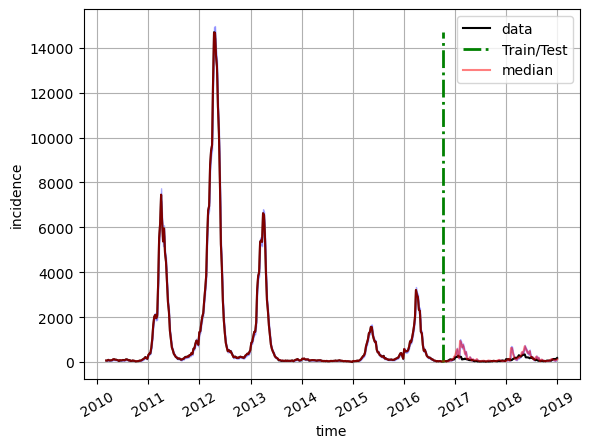

In [13]:

preds, preds25, preds975, X_train, targets = pgbm_pred(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK,
                                                           doenca = 'dengue', ratio = 0.75, ini_date = None,
                                                           end_date = END_DATE, label = 'train_test',  filename = FILENAME_DATA)

Estimator 0/100, Train metric: 1928.8376
Estimator 1/100, Train metric: 1761.5019
Estimator 2/100, Train metric: 1610.1994
Estimator 3/100, Train metric: 1471.2484
Estimator 4/100, Train metric: 1346.0692
Estimator 5/100, Train metric: 1232.7308
Estimator 6/100, Train metric: 1127.9072
Estimator 7/100, Train metric: 1032.3521
Estimator 8/100, Train metric: 946.1263
Estimator 9/100, Train metric: 866.9160
Estimator 10/100, Train metric: 794.6770
Estimator 11/100, Train metric: 728.9342
Estimator 12/100, Train metric: 668.4150
Estimator 13/100, Train metric: 613.5197
Estimator 14/100, Train metric: 562.8599
Estimator 15/100, Train metric: 517.1648
Estimator 16/100, Train metric: 475.7532
Estimator 17/100, Train metric: 437.1154
Estimator 18/100, Train metric: 401.9335
Estimator 19/100, Train metric: 369.9551
Estimator 20/100, Train metric: 340.8935
Estimator 21/100, Train metric: 314.4057
Estimator 22/100, Train metric: 290.2593
Estimator 23/100, Train metric: 268.1499
Estimator 24/100, 

Estimator 4/100, Train metric: 1365.9621
Estimator 5/100, Train metric: 1252.0466
Estimator 6/100, Train metric: 1149.0685
Estimator 7/100, Train metric: 1054.0107
Estimator 8/100, Train metric: 968.0693
Estimator 9/100, Train metric: 889.8529
Estimator 10/100, Train metric: 815.9888
Estimator 11/100, Train metric: 748.6904
Estimator 12/100, Train metric: 689.0215
Estimator 13/100, Train metric: 634.5849
Estimator 14/100, Train metric: 585.1032
Estimator 15/100, Train metric: 538.1427
Estimator 16/100, Train metric: 494.3510
Estimator 17/100, Train metric: 455.0871
Estimator 18/100, Train metric: 418.6457
Estimator 19/100, Train metric: 385.4428
Estimator 20/100, Train metric: 355.1445
Estimator 21/100, Train metric: 327.7367
Estimator 22/100, Train metric: 302.4143
Estimator 23/100, Train metric: 278.9986
Estimator 24/100, Train metric: 258.3958
Estimator 25/100, Train metric: 238.7597
Estimator 26/100, Train metric: 221.2543
Estimator 27/100, Train metric: 205.2359
Estimator 28/100, 

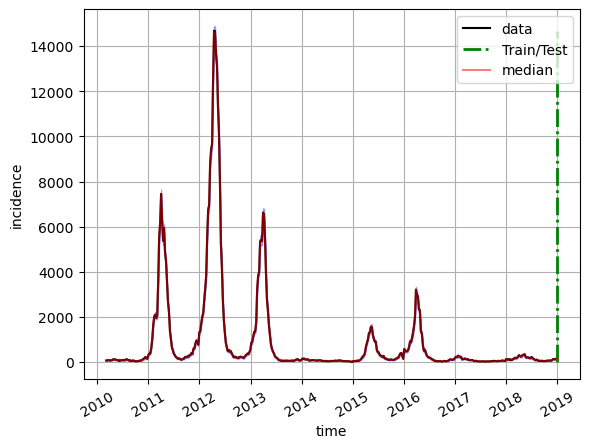

In [14]:
preds, preds25, preds975, X_train, targets = pgbm_pred(CITY, STATE, PREDICT_N, LOOK_BACK, doenca = 'dengue', ini_date = None, end_train_date = END_DATE, end_date = END_DATE,  filename = FILENAME_DATA)
   